# EDA and Feature Engg for Regression 

##  Problem statement - Prediction of Insurance Charges

### Note:- For any data science and machine learning project, understanding the exact problem statement is mandatory. It is the lone factor that will take direct the proceedings of complete lifecycle of the project.

### The work flow begins with understanding the problem that is being addressed. Followed by collection of data.

#### The collected data may have some impurities due to various reasons. Exploratory Data Analysis deals with understanding the data insights and handling the impurities existing in the data. The backbone of the project i.e. EDA clearly depicts the quality of the output of the project.



##### Importing basic libraries.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns
%matplotlib inline

###### Reading the file

In [2]:
x=pd.read_csv('insurance.csv')

## Understanding the data
### Overview head and bottom of the spreadsheet

In [3]:
x.head(6)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
5,31,0,25.740,0,0,southeast,3756.62160


In [4]:
x.tail(3)

,age,sex,bmi,children,smoker,region,charges
1335,18,0,36.85,0,0,southeast,1629.8335
1336,21,0,25.80,0,0,southwest,2007.9450
1337,61,0,29.07,0,1,northwest,29141.3603


## The Quantum of data

In [5]:
x.shape

(1338, 7)

In [6]:
x.size

9366

## Beginning with basic understaing of data
### Features and target informations

In [7]:
x.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


### From above it is noted about the features with understanding the type of data:
    The data contains no null values
    All the features and tragets are numeric values with int or float datatypes except the region which is object.
    lets understand the deeper insights of these feature.

In [9]:
for i in x:
    print(i,"-",len(x[i].unique()))
    

age - 47
sex - 2
bmi - 548
children - 6
smoker - 2
region - 4
charges - 1337


### Observations:
The point to be noted is the features have following demography:
    (i) Age - is discrete feature in int datatype
    (ii) sex - is boolian feature in int datatype (encoded)
    (iii) bmi- is continous feature in float datatype  
    (iv) children - is discrete feature in int datatype
    (v) smoker - is boolian feature in int datatype (encoded)
    (vi) region - is categorical feature in object datatype 
    
The Target variable charges is continous with float datatype
    

In [10]:
x.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Observation :
    As seen from above no feature or target have a missing value

### Stastistical information in the data

In [11]:
x.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


### Understading the distributions of quantitative variables and target

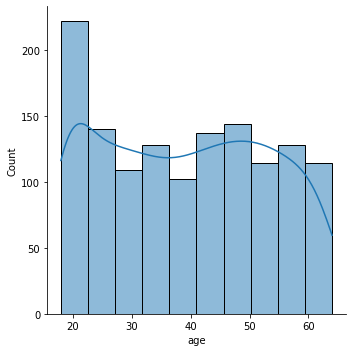

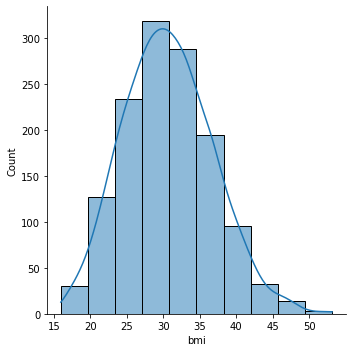

In [12]:
sns.displot(x['age'],bins=10,kde=True)
sns.displot(x['bmi'],bins=10,kde=True)

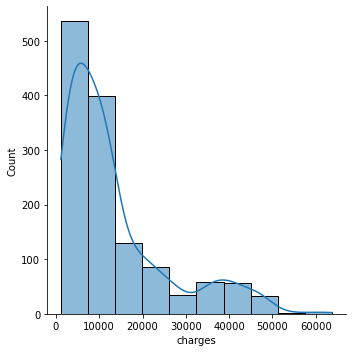

In [13]:
sns.displot(x['charges'],bins=10,kde=True)

## Understanding the correlation between target and other variables.

In [14]:
x.corr()

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


#### Correlation observations:
    Only the Smoker attribute which is boolian is correlated to charges.
    Other variables have very less impact on the charges (may it be positive or negative).
    
### Some domain knowledge suggests some strong relation of Age and BMI on charges which can not be seen from the data. However, data confirms the relationship of smoking on insurance charges.





### Attempting some visualisations to establish any relationship 

In [15]:
a1 = range(0,70)
a2 = range (0,70)
m2,c2,r2,p2,e2 =st.linregress(x.bmi,x.charges)
m1,c1,r1,p1,e1 =st.linregress(x.age,x.charges)
b1=c1+m1*a1
b2=c2+m2*a2
a1,b1=st.pearsonr(x.age,x.charges)
a2,b2=st.pearsonr(x.bmi,x.charges)

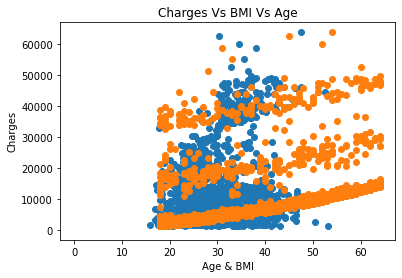

In [16]:
plt.plot(a1,b1,color='red')
plt.plot(a2,b2,color='green')
plt.scatter(x.bmi,x.charges)
plt.scatter(x.age,x.charges)
plt.title('Charges Vs BMI Vs Age')
plt.xlabel('Age & BMI')
plt.ylabel('Charges')
plt.show()

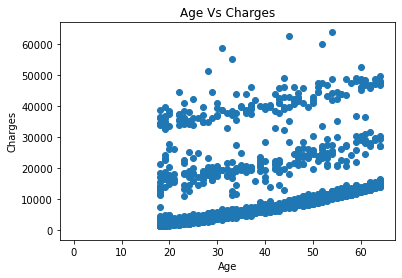

In [17]:
plt.scatter(x.age,x.charges)
plt.plot(a1,b1,color='red')
plt.ylabel('Charges')
plt.xlabel('Age')
plt.title('Age Vs Charges')
plt.show()

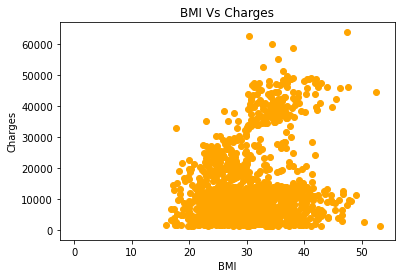

In [18]:
plt.plot(a2,b2,color='green')
plt.scatter(x.bmi,x.charges,color='orange')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI Vs Charges')
plt.show()

### trying to fit lines on all the variable with statistical analysis

In [19]:
x_n=x[x['smoker']==0]
x_s=x[x['smoker']==1]
an1,bn1=st.pearsonr(x_n.age,x_n.charges)
as1,bs1=st.pearsonr(x_s.age,x_s.charges)
an2,bn2=st.pearsonr(x_n.bmi,x_n.charges)
as2,bs2=st.pearsonr(x_s.bmi,x_s.charges)
mn1,cn1,rn1,pn1,en1 =st.linregress(x_n.age,x_n.charges)
mn2,cn2,rn2,pn2,en2 =st.linregress(x_n.bmi,x_n.charges)
ms1,cs1,rs1,ps1,es1 =st.linregress(x_s.age,x_s.charges)
ms2,cs2,rs2,ps2,es2 =st.linregress(x_s.bmi,x_s.charges)
an1 = range(15,70)
as1 = range (15,70)
an2 = range(15,70)
as2 = range (15,70)
bn1=cn1+mn1*an1
bn2=cn2+mn2*an1
bs1=cs1+ms1*as1
bs2=cs2+ms2*as2


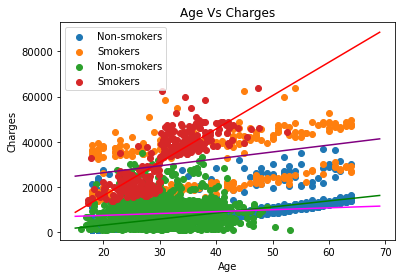

In [20]:
plt.plot(an1,bn1,color='green')
plt.plot(an2,bn2,color='magenta')
plt.plot(as2,bs2,color='red')
plt.plot(as1,bs1,color='purple')
plt.scatter(x_n.age,x_n.charges,label='Non-smokers')
plt.scatter(x_s.age,x_s.charges,label='Smokers')
plt.scatter(x_n.bmi,x_n.charges,label='Non-smokers')
plt.scatter(x_s.bmi,x_s.charges,label='Smokers')
plt.ylabel('Charges')
plt.xlabel('Age')
plt.title('Age Vs Charges')
plt.legend()
plt.show()

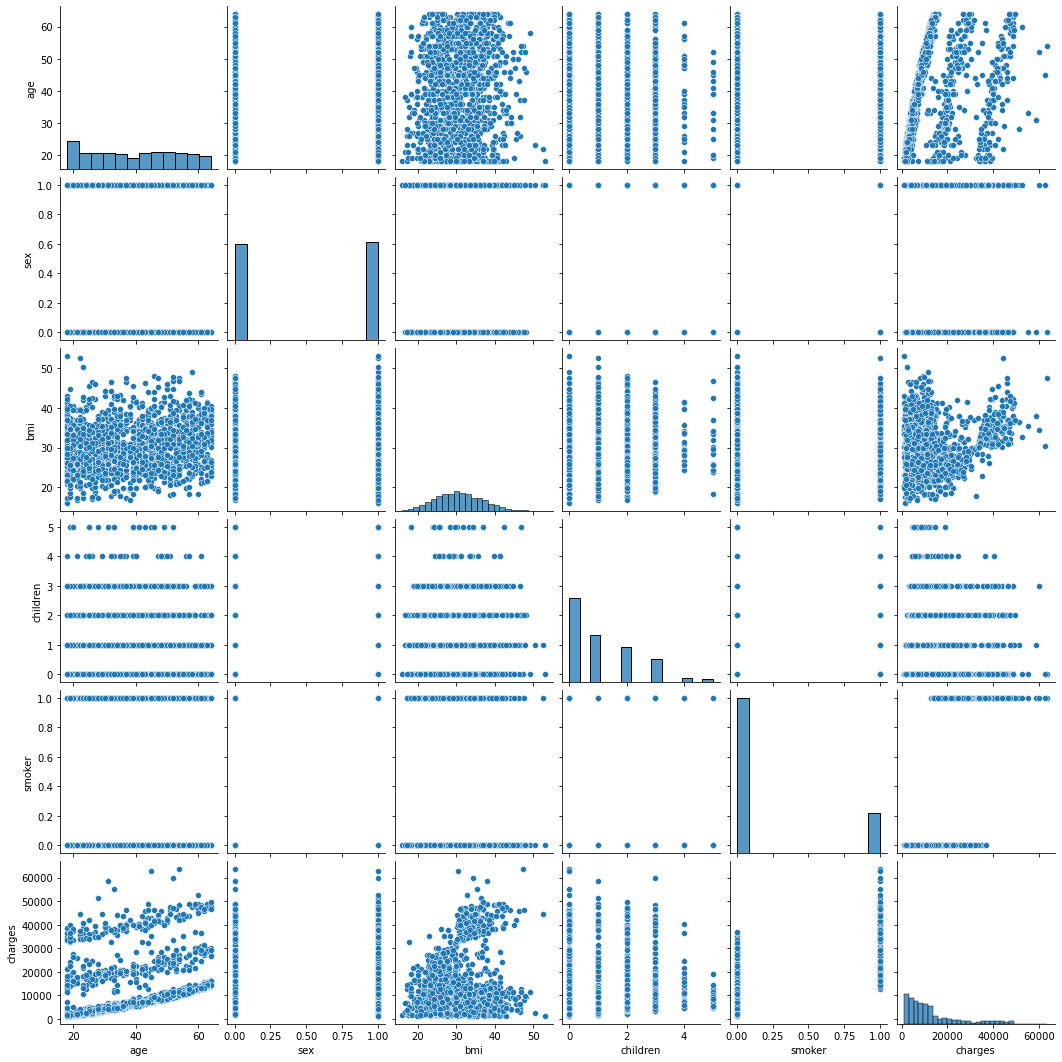

In [21]:
sns.pairplot(data=x)

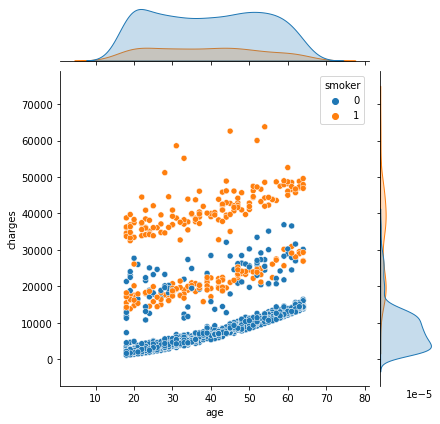

In [22]:
sns.jointplot(data=x, x='age',y='charges',hue='smoker')

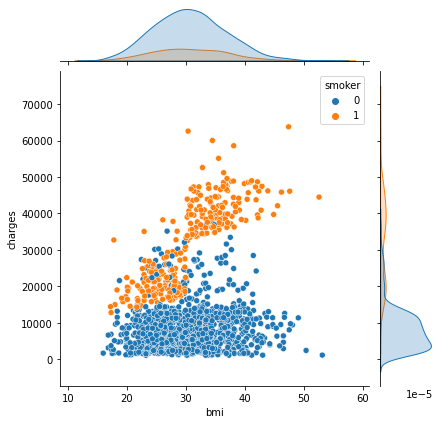

In [23]:
sns.jointplot(data=x, x='bmi',y='charges',hue='smoker')

## No visualisation clearly depicts powerful insight.

### lets perform simple scatter of the target vs all other variable with smoker as hue.

C:\Users\91730\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='charges'>

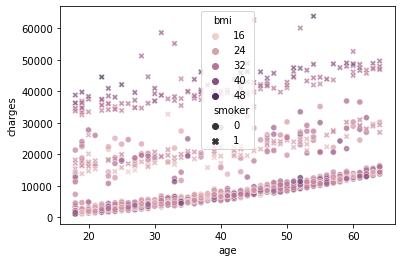

In [24]:
sns.scatterplot(x.age,x.charges,hue=x.bmi,alpha=0.7,style=x.smoker)


### Above visualisation clearly depicts the linear relationship of age to charges with factors like smoking and BMI affecting the increase or decrease in insurance charges.




## Lets attempt linear model and try to find accuracy metrics to establish the same.



### point to note is the data is cleaned and features are ready for model creation



In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [26]:
X=x.drop(['charges','region'],axis=1)
y=x.charges   

##### train test split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=105)

###### standardisation

In [28]:
scale=StandardScaler()
scale.fit (X_train, y_train)


StandardScaler()

In [29]:
scale.transform(X_train)
scale.transform(X_test)

array([[ 0.92401256,  0.99701343,  1.00287548,  0.75710525, -0.49906513],
       [ 0.85206841,  0.99701343,  0.87314283, -0.07829251, -0.49906513],
       [-0.37098222,  0.99701343,  0.58593597, -0.91369028, -0.49906513],
       ...,
       [-0.65875884,  0.99701343,  0.1273841 , -0.07829251, -0.49906513],
       [-1.5220887 ,  0.99701343,  2.02197028, -0.91369028, -0.49906513],
       [ 1.35567749,  0.99701343,  0.6153094 , -0.91369028, -0.49906513]])

#### Creation of model

In [30]:
lr=LinearRegression()

In [31]:
X_train

,age,sex,bmi,children,smoker
1006,28,1,29.260,2,0
1263,43,0,29.900,1,0
1293,46,1,25.745,3,0
519,31,1,30.875,0,0
1201,46,1,40.375,2,0
...,...,...,...,...,...
1252,20,1,27.300,0,1
73,58,1,32.010,1,0
790,39,0,41.800,0,0
629,44,0,38.950,0,1


In [32]:
lr.fit(X_train,y_train)

LinearRegression()

#### Testing the model on Test set

In [33]:
y_pred=lr.predict(X_test)

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [35]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error (y_test,y_pred)
RMSE = MSE**0.5

In [36]:
MSE



33820449.96235318

In [37]:
RMSE

5815.5352257856

In [38]:
MAE

4189.521646922167

In [39]:
lr.coef_

array([  251.7825149 ,  -226.8290041 ,   315.50219803,   385.63147514,
       23649.82221887])

In [40]:
lr.intercept_

-11455.194135683481